In [1]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
steam_df = pd.read_csv(".//112_UCR_Anomaly_BIDMC1_2500_5400_5600.csv")
steam_df.head()

,-3.45E+03
0,-3990.0
1,-4530.0
2,-5070.0
3,-5470.0
4,-5880.0


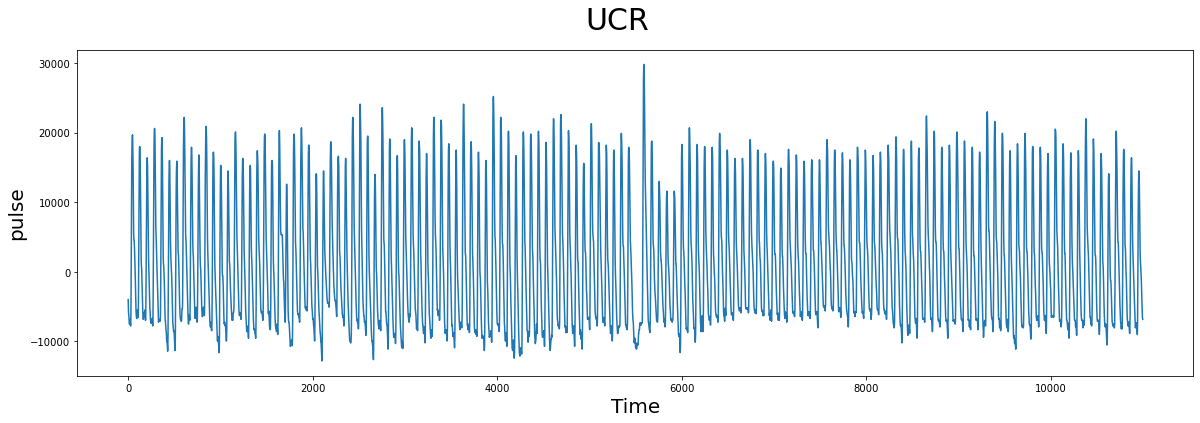

10999


In [3]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.suptitle('UCR', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('pulse', fontsize='20')
steam_df = pd.DataFrame(steam_df) 

steam_df.insert(0, 'id', range(1, 1 + len(steam_df)))
plt.plot(steam_df.values[:,1:2])
plt.show()
print(len(steam_df))

In [4]:
steam_df.head()

,id,-3.45E+03
0,1,-3990.0
1,2,-4530.0
2,3,-5070.0
3,4,-5470.0
4,5,-5880.0


In [5]:
import numpy as np
import scipy.signal

from matplotlib import pyplot as plt
L=steam_df['-3.45E+03'].values
L2=L
#L *= scipy.signal.windows.hann(len(L))

L = np.round(L, 1)
# Remove DC component
L -= np.mean(L)
# Window signal
L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")

#plt.plot(L)
#plt.figure()
#plt.plot(abs(fft))
def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")


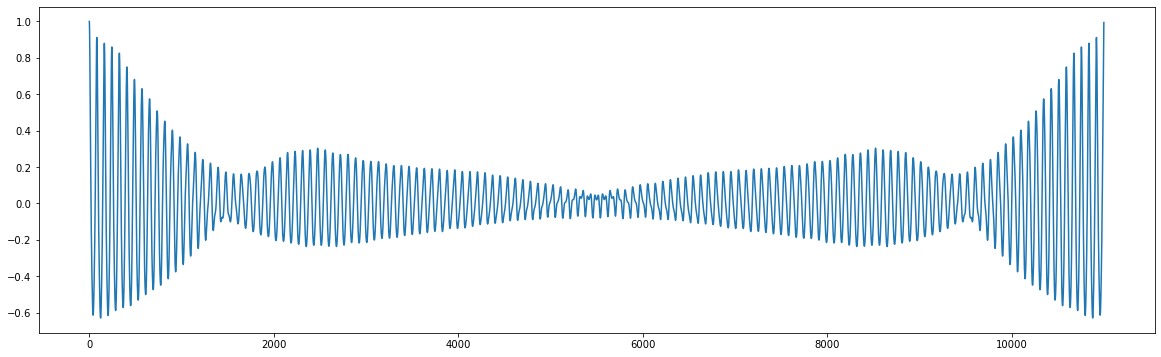

In [6]:
Ltrunk=1
multipleofperiod= np.argsort(selfconvol[1:len(L2)//4])
Ltrunk=L2[0:(len(L2//len(multipleofperiod))*len(multipleofperiod))]

fft = np.fft.rfft(Ltrunk, norm="ortho")
selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('second.jpg')
plt.show()


#get ranges for first min, second max
fmax=np.max(selfconvol[1:len(Ltrunk)//4])
fmin=np.min(selfconvol[1:len(Ltrunk)//4])
xstartmin=1
while selfconvol[xstartmin]>fmin+0.1*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1
    
xstartmax=xstartmin
while selfconvol[xstartmax]<fmin+0.1*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
    xstartmax=xstartmax+1

In [7]:

period=np.argmax(selfconvol[xstartmin:xstartmax])+xstartmax

print ("The period is ",period)


The period is  51


In [8]:
steam_df2 = pd.read_csv(".//12_UCR_Anomaly_BIDMC1_2500_5400_5600.csv",sep=';')

print(len(steam_df2["1"]))
steam_df2.head()

1048575


,1,-3.45E+03
0,2.0,-3990.0
1,3.0,-4530.0
2,4.0,-5070.0
3,5.0,-5470.0
4,6.0,-5880.0


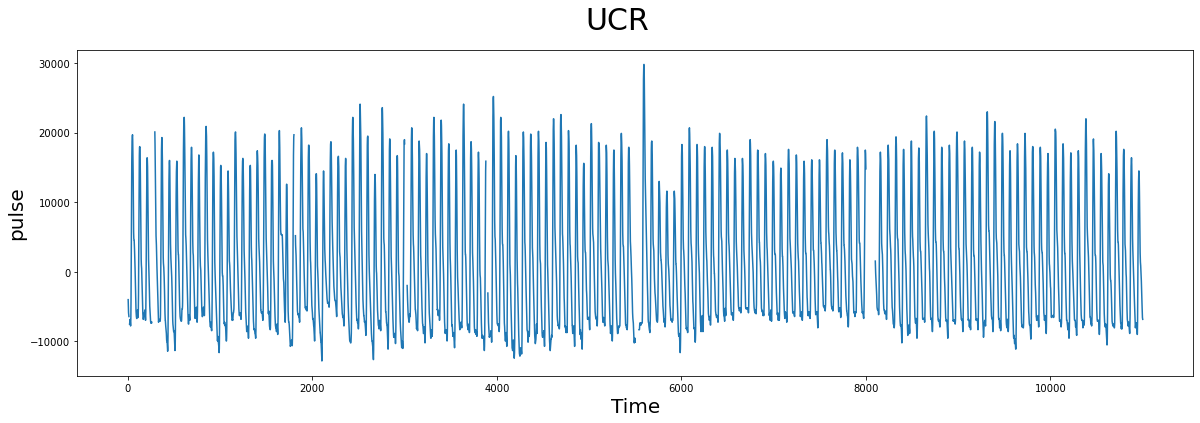

In [9]:
import matplotlib.pyplot as plt
from importlib import reload
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')
#plt=reload(plt)
x = steam_df2["1"]
plt.suptitle('UCR', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('pulse', fontsize='20')
#steam_df2 = pd.DataFrame(steam_df2) 

#steam_df2.insert(0, 'id', range(0,  len(steam_df2)))
plt.plot(x,steam_df2["-3.45E+03"])
plt.show()


In [10]:
from itertools import groupby
from operator import itemgetter
xd=(np.where(steam_df2["-3.45E+03"].isna()) )
xd=np.array(xd).tolist()
n=0
groups = []
for k, g in groupby(enumerate(xd.pop(0)), lambda x: x[0]-x[1]):
     
     groups.append(list(map(itemgetter(1), g)))
     print(len(groups[n]),groups[n])
     n=n+1


6 [9, 10, 11, 12, 13, 14]
33 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288]
15 [1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812]
26 [2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023]
21 [3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898]
40 [5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537]
101 [7998, 7999, 8000, 8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
steam_df2.interpolate(method='linear', limit_direction='forward', axis=0)

,1,-3.45E+03
0,2.0,-3990.000000
1,3.0,-4530.000000
2,4.0,-5070.000000
3,5.0,-5470.000000
4,6.0,-5880.000000
...,...,...
1048570,11000.0,0.973704
1048571,11000.0,0.980278
1048572,11000.0,0.986852
1048573,11000.0,0.993426


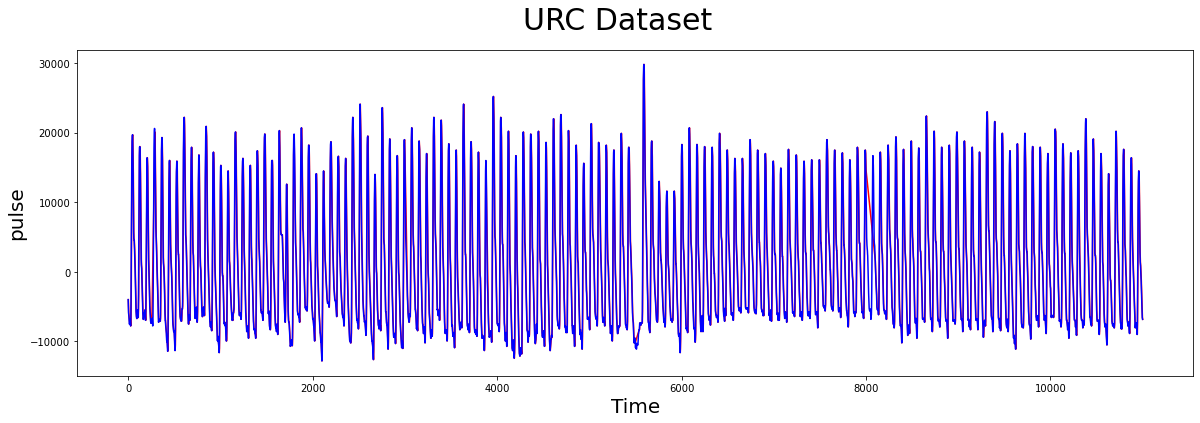

In [12]:
plt=reload(plt)
plt.suptitle('URC Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('pulse', fontsize='20')


plt.plot(x,steam_df2['-3.45E+03'].interpolate(method='linear', limit_direction='forward', axis=0),'r-')
plt.plot(steam_df['-3.45E+03'].values,'b-')
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
stm=steam_df2['-3.45E+03'].interpolate(method='linear', limit_direction='forward', axis=0)
scaler = preprocessing.MinMaxScaler()

#sqrt(mean_squared_error(steam_df['-3.45E+03'][7998:8098].values, stm[7998:8098].values, squared=False)/100)
sqrt(mean_squared_error(steam_df['-3.45E+03'][3878:3898].values, stm[3878:3898].values))
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

2222.7264931212612

In [17]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][3878:3898].values, stm[3878:3898].values)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 2034.5045454545457


In [18]:
tau, p_value=(scipy.stats.kendalltau(steam_df['-3.45E+03'][3878:3898].values, stm[3878:3898].values)
  )
print(tau,p_value)

1.0 8.22063524662433e-19


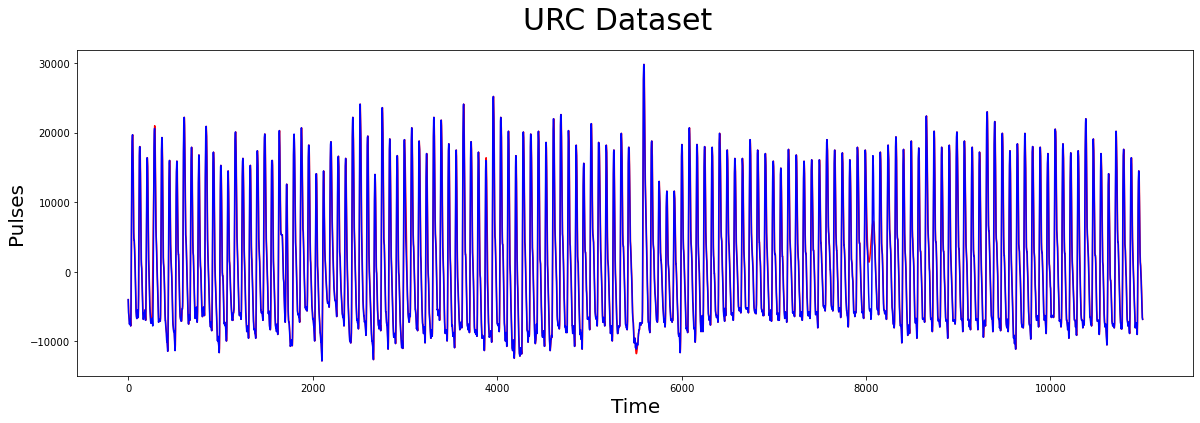

In [19]:
plt=reload(plt)
plt.suptitle('URC Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Pulses', fontsize='20')
plt.plot(x,steam_df2['-3.45E+03'].interpolate(method='polynomial', order=3),'r')
plt.plot(steam_df['-3.45E+03'].values,'b')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
stm2=steam_df2['-3.45E+03'].interpolate(method='polynomial', order=3)

#calculate RMSE
sqrt(mean_squared_error(steam_df['-3.45E+03'][3878:3898].values,stm2[3878:3898].values, squared=True))
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

2857.512383693648

In [21]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][3878:3898].values,stm2[3878:3898].values)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 2372.1779955474262


In [22]:
tau, p_value=(scipy.stats.kendalltau(steam_df['-3.45E+03'][3878:3898].values,stm2[3878:3898].values)
  )
print(tau,p_value)

0.9789473684210527 1.7181127665444849e-16


In [24]:
import scipy.stats
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.spatial import distance
# seed random number generator
seed(1)
# prepare data
K=495
x=0
r=0
i=0
z=0
c=0
e=0
e1=0
e2=100000
e3=0
steam_df2 = pd.read_csv(".//12_UCR_Anomaly_BIDMC1_2500_5400_5600.csv",sep=';')


    

for K in range(3000):
    
    #corrcoef = np.corrcoef(steam_df2['steam flow'][398:498],steam_df['steam flow'][K+495:K+595])
    #if corrcoef>c:
       # c=corrcoef
       # f=K+495
    #corrcoef =  signal.correlate(steam_df2['steam flow'][398:498],steam_df['steam flow'][K+495:K+595], mode='full', method='auto')
    e= distance.euclidean(np.array(steam_df2['-3.45E+03'][3755:3878]), np.array(steam_df['-3.45E+03'][K:K+123]))
    if e<e2:
        e2=e
        e3=K
    # calculate the spearmans's correlation between two variables
   # K=K+2000

    corr, _ = spearmanr(steam_df2['-3.45E+03'][3755:3878],steam_df['-3.45E+03'][K:K+123])
    if corr>r:
        r=corr
        i=K
    tau, p_value=(scipy.stats.kendalltau(steam_df2['-3.45E+03'][3755:3878],steam_df['-3.45E+03'][K:K+123]))
    if tau>x:
        x=tau
        z=(K)
   
    
print('Spearmans correlation: %.3f' % r,"   ",i) 
print('euclidean_distance: %.3f' % e2,"   ",e3) 
#print("covariance",c)     
print("tau",x,z)

Spearmans correlation: 0.985     1915
euclidean_distance: 15825.904     880
tau 0.9228741557781935 1915


Text(0.5, 0, 'Time')

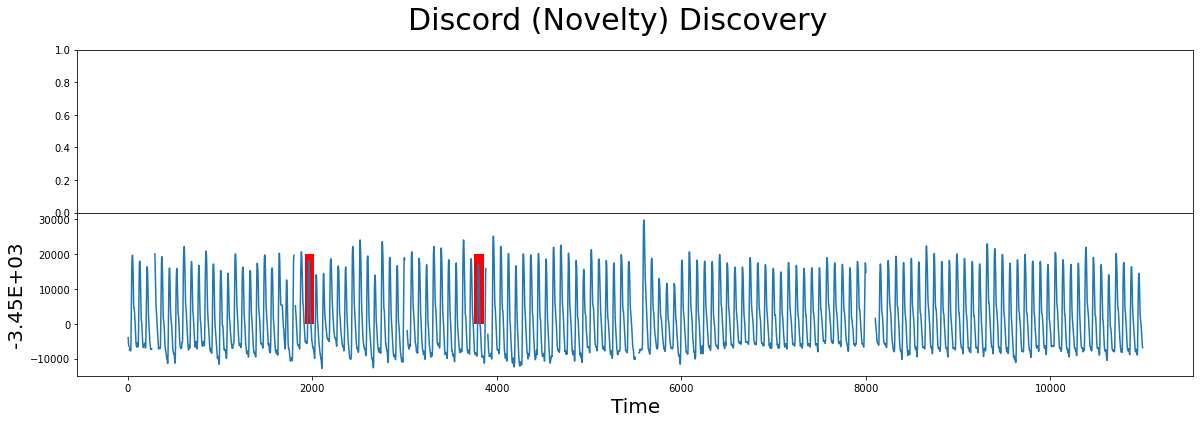

In [25]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
rect = Rectangle((1915, 0), 100, 20000, facecolor='red')
axs[1].add_patch(rect)
axs[1].plot(steam_df2['1'].values,steam_df2['-3.45E+03'].values)
axs[1].set_ylabel('-3.45E+03', fontsize='20')
rect = Rectangle((3755, 0), 100, 20000, facecolor='red')
axs[1].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')

In [28]:
import scipy.stats
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.spatial import distance
# seed random number generator
seed(1)
# prepare data
K=495
x=0
r=0
i=0
z=0
c=0
e=0
e1=0
e2=100000
e3=0
steam_df2 = pd.read_csv(".//12_UCR_Anomaly_BIDMC1_2500_5400_5600.csv",sep=';')


    

for K in range(3800):
    
    #corrcoef = np.corrcoef(steam_df2['steam flow'][398:498],steam_df['steam flow'][K+495:K+595])
    #if corrcoef>c:
       # c=corrcoef
       # f=K+495
    #corrcoef =  signal.correlate(steam_df2['steam flow'][398:498],steam_df['steam flow'][K+495:K+595], mode='full', method='auto')
    e= distance.euclidean(np.array(steam_df2['-3.45E+03'][3899:4022]), np.array(steam_df['-3.45E+03'][K:K+123]))
    if e<e2:
        e2=e
        e3=K
    # calculate the spearmans's correlation between two variables
   # K=K+2000

    corr, _ = spearmanr(steam_df2['-3.45E+03'][3899:4022],steam_df['-3.45E+03'][K:K+123])
    if corr>r:
        r=corr
        i=K
    tau, p_value=(scipy.stats.kendalltau(steam_df2['-3.45E+03'][3899:4022],steam_df['-3.45E+03'][K:K+123]))
    if tau>x:
        x=tau
        z=(K)
   
    
print('Spearmans correlation: %.3f' % r,"   ",i) 
print('euclidean_distance: %.3f' % e2,"   ",e3) 
#print("covariance",c)     
print("tau",x,z)

Spearmans correlation: 0.983     1581
euclidean_distance: 14504.659     3576
tau 0.9088095197726939 1580


Text(0.5, 0, 'Time')

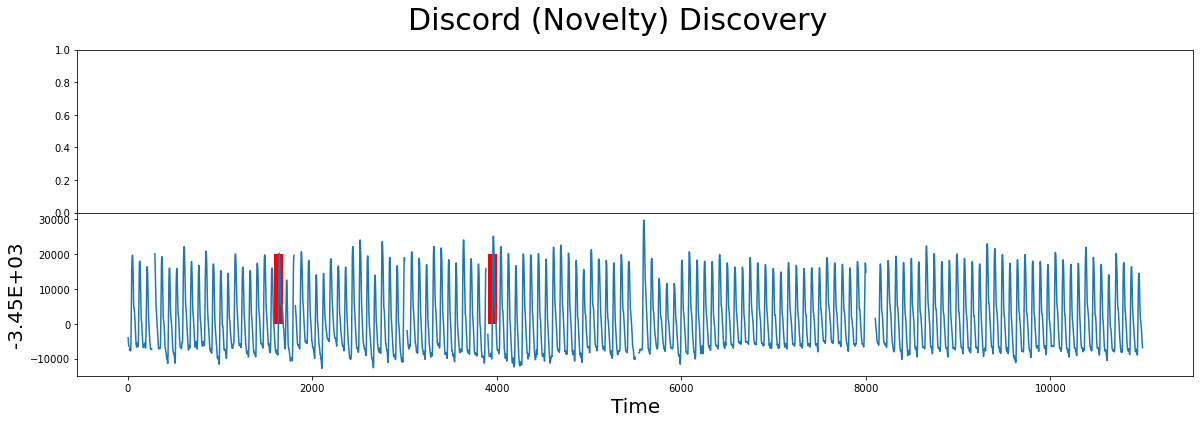

In [30]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
rect = Rectangle((1581, 0), 100, 20000, facecolor='red')
axs[1].add_patch(rect)
axs[1].plot(steam_df2['1'].values,steam_df2['-3.45E+03'].values)
axs[1].set_ylabel('-3.45E+03', fontsize='20')
rect = Rectangle((3898, 0), 100, 20000, facecolor='red')
axs[1].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')

Text(0.5, 0, 'Time')

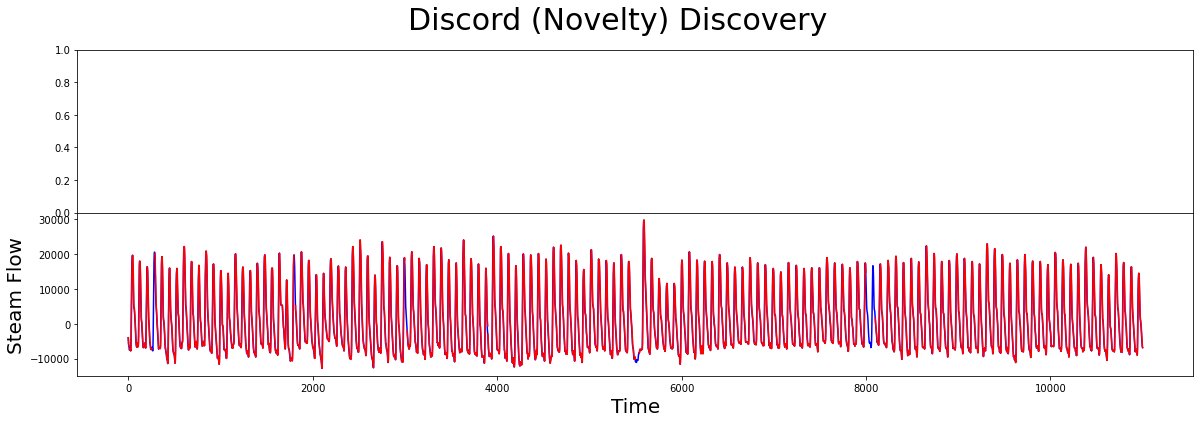

In [31]:
import scipy.stats

K=0
x=0
d=0
z=0

for K in range(11):

    x=(steam_df2['-3.45E+03'][1915+123+K:1916+123+K].values)#-steam_df2['steam flow'][1587+K:1588+K].values)
    d=(steam_df2['-3.45E+03'][1581-11+K:1582-11+K].values)
    steam_df2['-3.45E+03'][3878+K:3879+K]=x
    steam_df2['-3.45E+03'][3898-11+K:3899-11+K]=d
   
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
axs[1].plot(steam_df['-3.45E+03'].values,"-b")
#steam_df2.insert(0, 'id', range(1, 1 + len(steam_df2)))
#plt.plot(steam_df2.values[:,1:2])
axs[1].plot(steam_df2['1'].values,steam_df2['-3.45E+03'].values,"-r")
axs[1].set_ylabel('Steam Flow', fontsize='20')

axs[1].set_xlabel('Time', fontsize ='20')

In [32]:
tau, p_value=(scipy.stats.kendalltau(steam_df2['-3.45E+03'][3878:3898],steam_df['-3.45E+03'][3878:3898]))
print(tau,p_value)

0.9920738512408184 1.2106748816820572e-09


In [33]:
sqrt(mean_squared_error(steam_df['-3.45E+03'][3878:3898].values,steam_df2['-3.45E+03'][3878:3898].values, squared=True))
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

1271.1273736333428

In [34]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][3878:3898].values,steam_df2['-3.45E+03'][3878:3898].values)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 1144.4


Text(0.5, 0, 'Time')

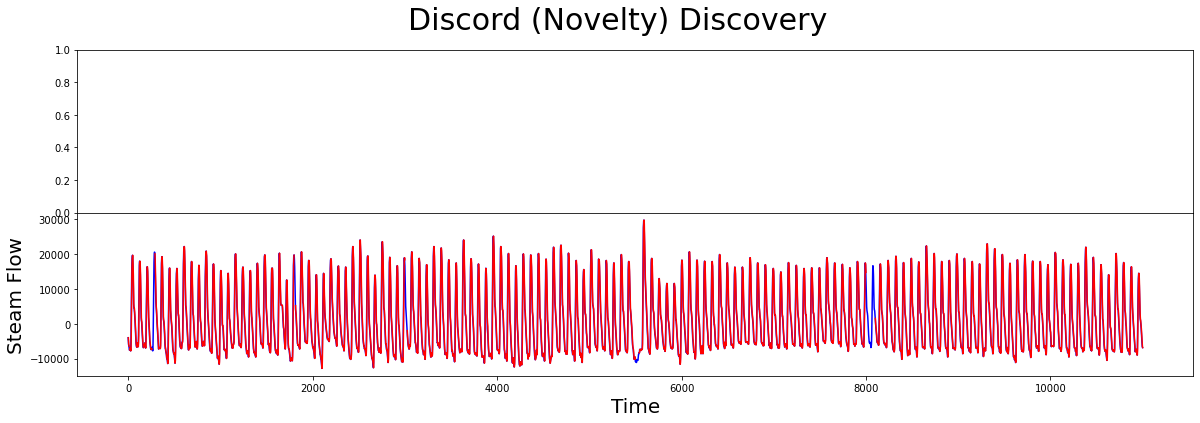

In [41]:
import scipy.stats

K=0
x=0
d=0
z=0

for K in range(21):
      

    x=(steam_df2['-3.45E+03'][1915+123+K:1916+123+K].values)#-steam_df2['steam flow'][1587+K:1588+K].values)
    d=(steam_df2['-3.45E+03'][1581-21+K:1582-21+K].values)
    steam_df2['-3.45E+03'][3878+K:3879+K]=(x+d)//2
    
   
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
axs[1].plot(steam_df['-3.45E+03'].values,"-b")
#steam_df2.insert(0, 'id', range(1, 1 + len(steam_df2)))
#plt.plot(steam_df2.values[:,1:2])
axs[1].plot(steam_df2['1'].values,steam_df2['-3.45E+03'].values,"-r")
axs[1].set_ylabel('Steam Flow', fontsize='20')

axs[1].set_xlabel('Time', fontsize ='20')

In [42]:
sqrt(mean_squared_error(steam_df['-3.45E+03'][3878:3898].values,steam_df2['-3.45E+03'][3878:3898].values, squared=True))
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

1015.1127523580817

In [43]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][3878:3898].values,steam_df2['-3.45E+03'][3878:3898].values)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 830.1


In [44]:
tau, p_value=(scipy.stats.kendalltau(steam_df2['-3.45E+03'][3878:3898],steam_df['-3.45E+03'][3878:3898]))
print(tau,p_value)

0.9920738512408184 1.2106748816820572e-09
